In [4]:
# Printing the content of the main dataset directory
print("Listing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9:")
!ls /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9

# Printing the content of the test directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test:")
!ls /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test

# Printing the content of the train directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/train:")
!ls /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/train

# Printing the content of the validation directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/valid:")
!ls /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/valid

# Printing the content of the test images directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test/images:")
!ls /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test/images

# Printing the content of the test labels directory
print("\nListing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test/labels:")
!ls /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test/labels


Listing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9:
data.yaml  test  train	valid

Listing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test:
images	labels

Listing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/train:
images	labels

Listing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/valid:
images	labels

Listing contents of /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/test/images:
fftc6_jpg.rf.701fff9d850d761fd948585eeee85dfc.jpg
FollicularVPTC-400x_png.rf.5ab74301a2d74a33adf2875f43179714.jpg
FVPTC100x-digitalzoom-well-developed-PTC-nuclear-features_png.rf.2bfc16e232a7c744345f3e7ccda6aa3b.jpg
Screenshot-2024-05-13-at-9-46-38-PM_png.rf.5c45cb694771f78a8d6dc8d55d771d09.jpg
thyroidfollicularvariantBychkov2_jpg.rf.2d3d2edb6ab9ccc9907d89a2e3676c

# Dataset3 Analysis and Visualization Report

This cell provides a comprehensive overview of Dataset3, which focuses on the Follicular Variant of Thyroid Cancer. The analysis includes:

1. **Basic Dataset Overview**  
   - Lists the number of images and label files for each split (train, valid, test).
   - Computes the number of images that are missing corresponding labels.

2. **Label Distribution Analysis**  
   - Loads class names from the `data.yaml` configuration file.
   - Counts the occurrences of each class in the training set.
   - Visualizes the class distribution using a bar chart.

3. **Sample Image Visualization with Bounding Boxes**  
   - Randomly selects a sample image from the training set.
   - Reads the corresponding label file and draws bounding boxes on the image.
   - Displays the annotated image.  
   *Note: In cases where label files contain more than 5 values, only the first five (class id, x_center, y_center, width, height) are used.*

4. **Corrupt Image Check**  
   - Scans the training images to identify any corrupt files.
   - Prints the number and names of any corrupt images found.

By running this cell, you can verify the dataset's integrity, understand the class distribution, and visually inspect sample images with their annotations.


Dataset3 - Basic Overview:

TRAIN SET:
  Images: 39
  Labels: 39
  Missing labels: 0

VALID SET:
  Images: 5
  Labels: 5
  Missing labels: 0

TEST SET:
  Images: 5
  Labels: 5
  Missing labels: 0



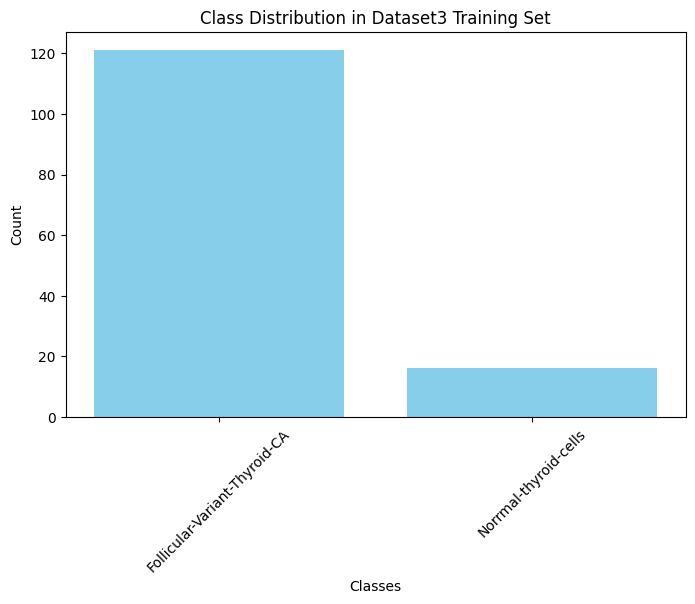

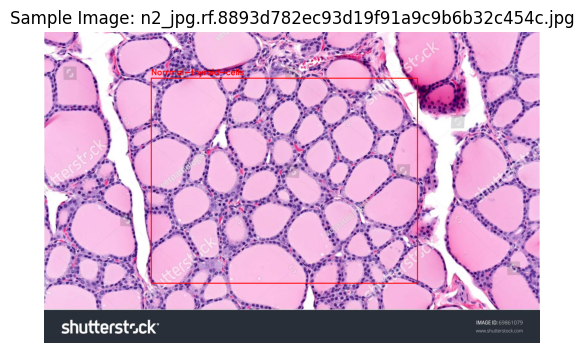

Corrupt images in /kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9/train/images: 0


In [6]:
import os
import yaml
import random
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# ========================
# Configuration for Dataset3
# ========================
dataset3_path = "/kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9"
splits = ["train", "valid", "test"]

# ========================
# 1. Basic Dataset Overview
# ========================
print("Dataset3 - Basic Overview:\n")
for split in splits:
    img_dir = os.path.join(dataset3_path, split, "images")
    lbl_dir = os.path.join(dataset3_path, split, "labels")
    num_imgs = len([f for f in os.listdir(img_dir) if f.endswith(".jpg")])
    num_lbls = len([f for f in os.listdir(lbl_dir) if f.endswith(".txt")])
    print(f"{split.upper()} SET:")
    print(f"  Images: {num_imgs}")
    print(f"  Labels: {num_lbls}")
    print(f"  Missing labels: {num_imgs - num_lbls}\n")

# ========================
# 2. Label Distribution Analysis
# ========================
# Load class names from the data.yaml file in Dataset3
data_yaml_path = os.path.join(dataset3_path, "data.yaml")
with open(data_yaml_path, "r") as f:
    data_yaml = yaml.safe_load(f)
class_names = data_yaml["names"]

# Count class occurrences in the training set
train_label_dir = os.path.join(dataset3_path, "train", "labels")
class_counts = {i: 0 for i in range(len(class_names))}
for file in os.listdir(train_label_dir):
    file_path = os.path.join(train_label_dir, file)
    with open(file_path, "r") as f:
        for line in f.readlines():
            cid = int(line.split()[0])
            class_counts[cid] += 1

plt.figure(figsize=(8, 5))
plt.bar(class_names, list(class_counts.values()), color="skyblue")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset3 Training Set")
plt.xticks(rotation=45)
plt.show()

# ========================
# 3. Sample Image Visualization with Bounding Boxes
# ========================
def display_sample_image(image_dir, label_dir):
    images = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
    sample = random.choice(images)
    img_path = os.path.join(image_dir, sample)
    lbl_path = os.path.join(label_dir, sample.replace(".jpg", ".txt"))
    
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    if os.path.exists(lbl_path):
        with open(lbl_path, "r") as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) < 5:
                    continue
                # Use only the first 5 values (in case there are extra values)
                cid, x_center, y_center, width, height = map(float, parts[:5])
                xmin = int((x_center - width / 2) * w)
                ymin = int((y_center - height / 2) * h)
                xmax = int((x_center + width / 2) * w)
                ymax = int((y_center + height / 2) * h)
                cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
                cv2.putText(img, class_names[int(cid)], (xmin, ymin - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample Image: {sample}")
    plt.show()

# Display a random sample from the training set
display_sample_image(os.path.join(dataset3_path, "train", "images"),
                     os.path.join(dataset3_path, "train", "labels"))

# ========================
# 4. Check for Corrupt Images in the Training Set
# ========================
def find_corrupt_images(folder):
    corrupt_list = []
    for file in os.listdir(folder):
        if file.endswith(".jpg"):
            try:
                img = Image.open(os.path.join(folder, file))
                img.verify()
            except Exception as e:
                corrupt_list.append(file)
    print(f"Corrupt images in {folder}: {len(corrupt_list)}")
    if corrupt_list:
        print(corrupt_list)

find_corrupt_images(os.path.join(dataset3_path, "train", "images"))


# Dataset3 Preprocessing Documentation

This cell preprocesses Dataset3 by standardizing images and preserving label files for each dataset split. The following steps are performed:

1. **Path Setup:**
   - **Raw Dataset:** Located at `/kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9`
   - **Processed Dataset Destination:** Stored in `data/processed/dataset3`

2. **Dataset Splits:**
   - The dataset is divided into three splits: **train**, **valid**, and **test**.

3. **Image Preprocessing:**
   - **Resizing:** Each image is resized to a target size of **640 x 640** pixels.
   - **Normalization:** Pixel values are normalized to the range [0, 1].
   - **Saving:** Processed images are saved as 8-bit images, converting the normalized values back to 0-255.

4. **Label File Handling:**
   - The label files (in YOLO format, with a `.txt` extension) are directly copied from the raw dataset to the corresponding folder in the processed dataset.

5. **Outcome:**
   - After execution, all dataset splits (train, valid, test) will be preprocessed and stored in `data/processed/dataset3`, ready for further analysis or model training.


In [7]:
import os
import cv2
from pathlib import Path
import shutil

# Set raw dataset path for Dataset3
raw_base = Path("/kaggle/input/d/mgopich/dataset3-follicular/Follicular_Variant_Thyroid_CA.v1i.yolov9")
# Set destination for processed Dataset3
processed_base = Path("data/processed/dataset3")  # This folder will contain train, valid, test

# Define the splits to process
splits = ["train", "valid", "test"]
TARGET_SIZE = (640, 640)

def preprocess_image(image_path, target_size=TARGET_SIZE):
    """Resize image to target size and normalize pixel values."""
    img = cv2.imread(str(image_path))
    if img is None:
        print(f"Warning: Unable to read {image_path}")
        return None
    img = cv2.resize(img, target_size)
    # Normalize pixel values to [0,1]
    img_norm = img.astype("float32") / 255.0
    return img_norm

# Process each split: resize images and copy label files
for split in splits:
    raw_img_dir = raw_base / split / "images"
    raw_label_dir = raw_base / split / "labels"
    
    proc_img_dir = processed_base / split / "images"
    proc_label_dir = processed_base / split / "labels"
    proc_img_dir.mkdir(parents=True, exist_ok=True)
    proc_label_dir.mkdir(parents=True, exist_ok=True)
    
    # Process images: resize, normalize, and save as 8-bit image
    for img_file in raw_img_dir.glob("*.jpg"):
        processed_img = preprocess_image(img_file)
        if processed_img is not None:
            output_path = proc_img_dir / img_file.name
            # Save as 8-bit image
            cv2.imwrite(str(output_path), (processed_img * 255).astype("uint8"))
    
    # Copy label files
    for label_file in raw_label_dir.glob("*.txt"):
        target_file = proc_label_dir / label_file.name
        shutil.copy(label_file, target_file)
    
    print(f"Preprocessing for {split} split completed.")

print("All splits for Dataset3 have been preprocessed and saved to", processed_base)


Preprocessing for train split completed.
Preprocessing for valid split completed.
Preprocessing for test split completed.
All splits for Dataset3 have been preprocessed and saved to data/processed/dataset3


# Dataset2 Training Data Augmentation Documentation

This cell performs data augmentation on the training split of Dataset2. The main steps and configuration details are as follows:

- **Suppressing Update Warning:**  
  The Albumentations update warning is suppressed by setting the environment variable `NO_ALBUMENTATIONS_UPDATE` to `"1"`.

- **Directory Setup:**  
  - **Processed Data:**  
    The processed training images and label files (obtained from an earlier preprocessing step) are stored in `processed_base/train/images` and `processed_base/train/labels` respectively.
  - **Augmented Data:**  
    Augmented images and their corresponding label files will be saved in a separate directory structure under `processed_base/train_aug/images` and `processed_base/train_aug/labels`.

- **Augmentation Pipeline:**  
  An Albumentations pipeline is defined to perform the following augmentations:
  - Horizontal flipping (with 50% probability)
  - Rotation (limit of 20° with 50% probability)
  - Random brightness and contrast adjustment (30% probability)
  - Gaussian blur (with blur limits of 3 to 7, 30% probability)
  - Gaussian noise addition (with variance limits between 10.0 and 50.0, 30% probability)
  
  The pipeline is configured to work with YOLO format bounding boxes (i.e., bounding boxes represented as `[x_center, y_center, width, height]`). The field `category_ids` is used to keep track of object class identifiers.

- **Augmentation Process:**  
  For each training image:
  1. The image is read, and its shape is obtained.
  2. The corresponding YOLO-format bounding boxes and class IDs are read from the label file.
  3. The augmentation pipeline is applied to both the image and the bounding boxes.
  4. The augmented image is converted from RGB to BGR format (as required by OpenCV) and saved.
  5. The augmented bounding box coordinates are saved in a new label file, with values formatted to six decimal places.

- **Outcome:**  
  After executing the cell, the augmented training data is stored in the designated directories, ready for use in model training or further analysis.


In [10]:
import os
# Suppress Albumentations update warning
os.environ["NO_ALBUMENTATIONS_UPDATE"] = "1"

import cv2
import albumentations as A
from pathlib import Path

# Make sure processed_base is defined; for example:
# processed_base = Path("/kaggle/working/data/processed/dataset3")

# Directories for processed training data (from preprocessing step)
proc_train_img_dir = processed_base / "train" / "images"
proc_train_label_dir = processed_base / "train" / "labels"

# Create directories to save augmented training data
aug_train_img_dir = processed_base / "train_aug" / "images"
aug_train_label_dir = processed_base / "train_aug" / "labels"
aug_train_img_dir.mkdir(parents=True, exist_ok=True)
aug_train_label_dir.mkdir(parents=True, exist_ok=True)

# Define the augmentation pipeline (YOLO format)
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.GaussianBlur(blur_limit=(3, 7), p=0.3),
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
], bbox_params=A.BboxParams(format="yolo", label_fields=["category_ids"]))

def augment_image_and_labels(image_path, label_path, transform):
    # Read image
    image = cv2.imread(str(image_path))
    h, w, _ = image.shape
    
    # Read YOLO-format bounding boxes from label file
    bboxes = []
    category_ids = []
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    class_id, x_center, y_center, width, height = map(float, parts)
                    bboxes.append([x_center, y_center, width, height])
                    category_ids.append(int(class_id))
    
    # Apply augmentation
    transformed = transform(image=image, bboxes=bboxes, category_ids=category_ids)
    aug_image = transformed["image"]
    aug_bboxes = transformed["bboxes"]
    aug_category_ids = transformed["category_ids"]
    
    return aug_image, aug_bboxes, aug_category_ids

# Process each image in the training images directory
for img_file in proc_train_img_dir.glob("*.jpg"):
    label_file = proc_train_label_dir / img_file.with_suffix(".txt").name
    aug_img, aug_bboxes, aug_cat_ids = augment_image_and_labels(img_file, label_file, transform)
    
    # Convert image to BGR for saving with cv2.imwrite
    aug_img_bgr = cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR)
    output_img_path = aug_train_img_dir / f"aug_{img_file.name}"
    cv2.imwrite(str(output_img_path), aug_img_bgr)
    
    output_label_path = aug_train_label_dir / f"aug_{img_file.with_suffix('.txt').name}"
    with open(output_label_path, "w") as f:
        for cid, bbox in zip(aug_cat_ids, aug_bboxes):
            line = f"{cid} " + " ".join(f"{v:.6f}" for v in bbox) + "\n"
            f.write(line)

print("Augmentation for Dataset3 training split completed. Augmented data saved to", aug_train_img_dir)


Augmentation for Dataset3 training split completed. Augmented data saved to data/processed/dataset3/train_aug/images


# Processed Dataset3 Download

This cell performs the following actions for Dataset3:

- **Listing Contents:**  
  It displays the contents of the processed Dataset3 directory (`/kaggle/working/data/processed/dataset3`).

- **Creating a ZIP Archive:**  
  The entire processed Dataset3 directory is zipped into a file named `processed_dataset3.zip`. This makes it easier to download the dataset as a single file.

- **Download Link:**  
  A clickable download link is generated using IPython's `FileLink` function, which allows you to easily download the ZIP archive.




In [11]:
# List the contents of the processed Dataset3 directory
!ls /kaggle/working/data/processed/dataset3

# Zip the processed Dataset3 directory into a file named processed_dataset3.zip
!zip -r processed_dataset3.zip /kaggle/working/data/processed/dataset3

# Create a download link for the zipped file
from IPython.display import FileLink
FileLink(r'processed_dataset3.zip')


test  train  train_aug	valid
  adding: kaggle/working/data/processed/dataset3/ (stored 0%)
  adding: kaggle/working/data/processed/dataset3/valid/ (stored 0%)
  adding: kaggle/working/data/processed/dataset3/valid/labels/ (stored 0%)
  adding: kaggle/working/data/processed/dataset3/valid/labels/Screenshot-2024-05-13-at-9-09-01-PM_png.rf.59a221d89fa6048cbef24d865b8ef206.txt (deflated 51%)
  adding: kaggle/working/data/processed/dataset3/valid/labels/FollicularVPTC400x_png.rf.6e865f97dd5b94777b093ee5cad73eac.txt (deflated 51%)
  adding: kaggle/working/data/processed/dataset3/valid/labels/Screenshot-2024-05-13-at-9-47-04-PM_png.rf.01783f95c3f4f86fafe2c7c65101098b.txt (deflated 51%)
  adding: kaggle/working/data/processed/dataset3/valid/labels/figure-005-a40629_large_jpg.rf.744a9f10af03673a7bae7c4a37ae83a2.txt (deflated 53%)
  adding: kaggle/working/data/processed/dataset3/valid/labels/Thyroid_papillary_carcinoma_histopathology_-3-_jpg.rf.9f2a73680613ebf7d0c72ebbc0a6267d.txt (deflated 52%)

/kaggle/working/processed_dataset3.zip